# 0. Setup

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import json
import pickle
import powerlaw as pwl
from matplotlib import patheffects
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression

sns.set_style("ticks")

In [46]:
FIGSIZE = (12, 4)

In [47]:
def get_count_from_file(filepath):
    """ Opens filepath and returns a numpy array with the results count """

    if filepath.endswith("pkl"):
        with open(filepath, "rb") as f:
            data = pickle.load(f)

        counts = []
        for k in data:
            counts.append([c for _, c in k])

        return np.array(counts)
    else:
        with open(filepath, "r") as f:
            return json.load(f)

In [116]:
def display_snippets(filename, n=1):
    with open(filename, "rb") as f:
        data = pickle.load(f)

    d = data[n-1][0][0]
    n_results = d['searchInformation']['totalResults']
    print(f"total results: {n_results}")

    for item in data[n-1][0][0]['items']:
        print(f"-" * 50)
        print(item['title'])
        print("\t", item['snippet'])
        print("\t", item['link'])

## 1. Results

In [49]:
data = [
    {
        "Risada": "k",
        "Idioma": "Português",
        "Count": "data/k_twitter_2s_1-50_count.json"
    },
    {
        "Risada": "ha",
        "Idioma": "Português",
        "Count": "data/ha_twitter_2s_1-50_count.json"
    },
    {
        "Risada": "he",
        "Idioma": "Português",
        "Count": "data/he_twitter_1s_1-30_count.json"
    },
    {
        "Risada": "hi",
        "Idioma": "Português",
        "Count": "data/hi_twitter_2s_1-50_count.json"
    },
    {
        "Risada": "ho",
        "Idioma": "Português",
        "Count": "data/ho_twitter_2s_1-50_count.json"
    },
    {
        "Risada": "rs",
        "Idioma": "Português",
        "Count": "data/rs_twitter_1s_1-30_count.json"
    },
    {
        "Risada": "w",
        "Idioma": "Japonês",
        "Count": "data/w_twitter_2s_1-50_count_cleaned.json"
    },
    {
        "Risada": "5",
        "Idioma": "Tailandês",
        "Count": "data/5_twitter_2s_1-50_count.json"
    },
    {
        "Risada": "ja",
        "Idioma": "Espanhol",
        "Count": "data/ja_twitter_2s_1-50_count.json"
    },
    {
        "Risada": "ha",
        "Idioma": "Inglês",
        "Count": "data/ha_twitter_2s_1-50_en_count.json"
    },
    {
        "Risada": "wk",
        "Idioma": "Indonésio",
        "Count": "data/wk_twitter_2s_1-50_count.json"
    },
    {
        "Risada": "xa",
        "Idioma": "Russo",
        "Count": "data/xa_twitter_2s_1-50_count.json"
    }
]

In [50]:
df_name_ids, df_names, df_number, df_values, df_countries = [], [], [], [], []

for i, d in enumerate(data):
    count = get_count_from_file(d["Count"])
    count = [np.mean(x) for x in count]
    for j, val in enumerate(count):
        df_name_ids.append(i+1)
        df_names.append(d["Risada"])
        df_number.append(j+1)
        df_values.append(val)
        df_countries.append(d["Idioma"])

df = pd.DataFrame({"Risada ID": df_name_ids, "Risada": df_names, "n": df_number, "Count": df_values, "Idioma": df_countries})
df.loc[:, "Risada x Idioma"] = df["Risada"] + " (" + df["Idioma"].astype(str) + ")"
df.loc[:, "Partículas"] = df["n"] * df["Count"]

df_br = df[df['Idioma'] == "Português"]
df_int = df[(df['Idioma'] != "Português") | (df["Risada"] == "k")]

df

,Risada ID,Risada,n,Count,Idioma,Risada x Idioma,Partículas
0,1,k,1,8430000.0,Português,k (Português),8430000.0
1,1,k,2,195375.0,Português,k (Português),390750.0
2,1,k,3,416250.0,Português,k (Português),1248750.0
3,1,k,4,563125.0,Português,k (Português),2252500.0
4,1,k,5,523750.0,Português,k (Português),2618750.0
...,...,...,...,...,...,...,...
360,12,xa,1,2250.0,Russo,xa (Russo),2250.0
361,12,xa,2,7.0,Russo,xa (Russo),14.0
362,12,xa,3,4.0,Russo,xa (Russo),12.0
363,12,xa,4,5.0,Russo,xa (Russo),20.0


## 2. Plots

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

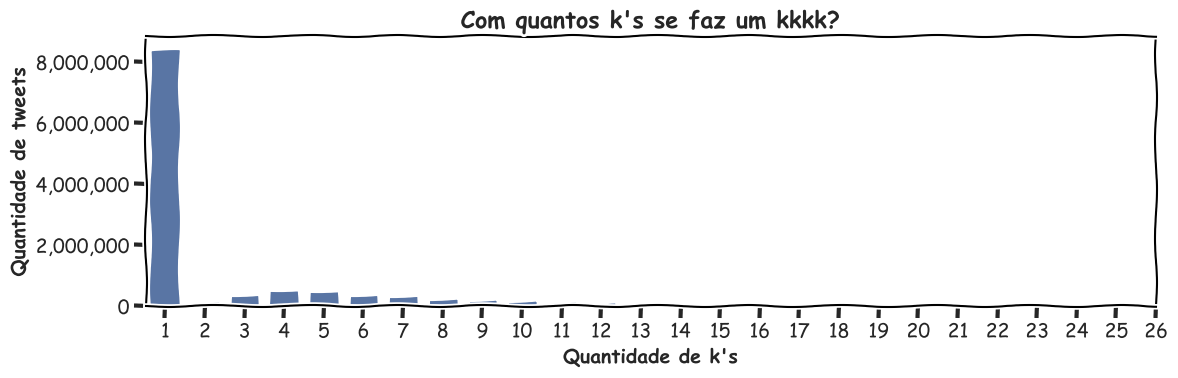

In [51]:
with plt.xkcd():
    plt.figure(figsize=FIGSIZE)
    sns.barplot(data=df_br[df_br['Risada'] == 'k'], x="n", y="Count", orient='v', color=sns.color_palette("deep")[0], linewidth=3)

    # ax.text(df_["Count"][0] - 400000, 0.125, str(int(df_["Count"][0])), color='black', fontweight='bold')
    # for i, v in enumerate(df_["Count"][1:]):
    #     ax.text(v + 20000, (i + 1) + 0.125, str(int(v)), color='black', fontweight='bold')

    plt.xlim((-0.5, 25))
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.xlabel("Quantidade de k's", fontweight="bold")
    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.title("Com quantos k's se faz um kkkk?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risada_kkk_bars.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

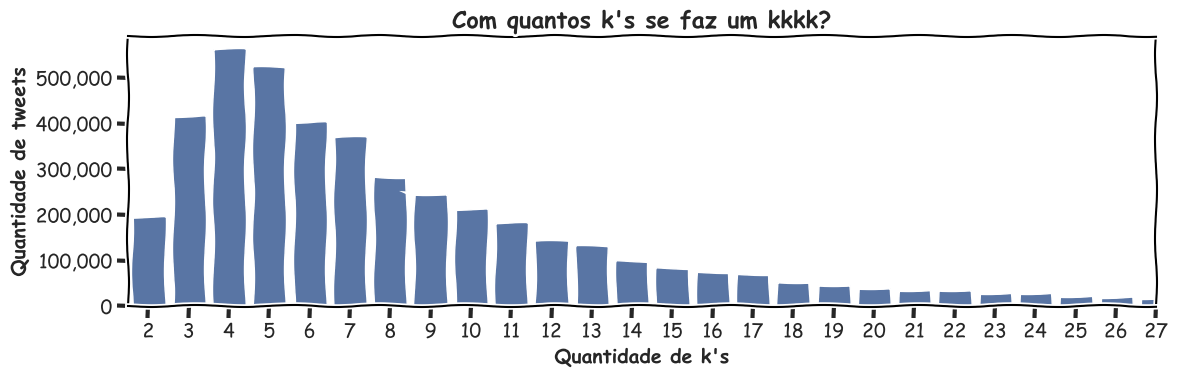

In [52]:
with plt.xkcd():
    df_ = df_br[(df_br['Risada'] == 'k') & (df_br['n'] > 1)]

    plt.figure(figsize=FIGSIZE)
    sns.barplot(data=df_, x=df_['n'], y=df_['Count'], color=sns.color_palette("deep")[0])
    # plt.plot(df_['n'], df_['Count'] + 3*10**4, color=sns.color_palette("deep")[0], linewidth=3, marker='o')
    # plt.bar(df_['n'], df_['Count'], color=sns.color_palette("deep")[0], linewidth=3)

    # ax.text(df_["Count"][0] - 400000, 0.125, str(int(df_["Count"][0])), color='black', fontweight='bold')
    # for i, v in enumerate(df_["Count"][1:]):
    #     ax.text(v + 20000, (i + 1) + 0.125, str(int(v)), color='black', fontweight='bold')

    plt.xlim((-0.5, 25))
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.xlabel("Quantidade de k's", fontweight="bold")
    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.title("Com quantos k's se faz um kkkk?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risada_kkk_bars_2.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

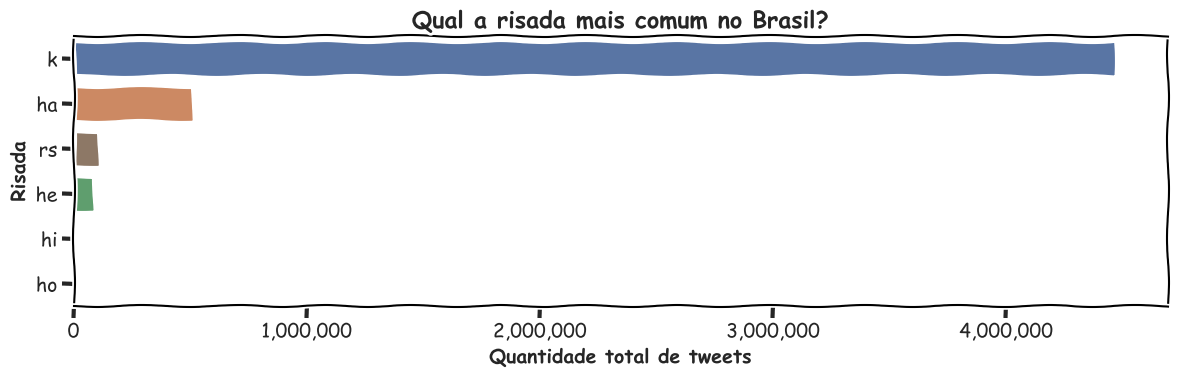

In [53]:
with plt.xkcd():
    df_ = df_br[df_br['n'] > 1].groupby("Risada").agg({"Risada ID": "first", "Count": "sum"})
    df_ = df_.sort_values(by="Risada ID")
    df_ = df_.reset_index()
    df_.sort_values(by="Count", ascending=False, inplace=True)
    colors = [sns.color_palette("deep")[i] for i in df_.index.values]

    plt.figure(figsize=FIGSIZE)
    sns.barplot(data=df_, y="Risada", x="Count", orient='h', linewidth=3, palette=colors)

    # ax.text(df_["Count"][0] - 400000, 0.125, str(int(df_["Count"][0])), color='black', fontweight='bold')
    # for i, v in enumerate(df_["Count"][1:]):
    #     ax.text(v + 20000, (i + 1) + 0.125, str(int(v)), color='black', fontweight='bold')

    plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.xlabel("Quantidade total de tweets", fontweight="bold")
    plt.ylabel("Risada", fontweight="bold")
    plt.title("Qual a risada mais comum no Brasil?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risada_br_bars.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

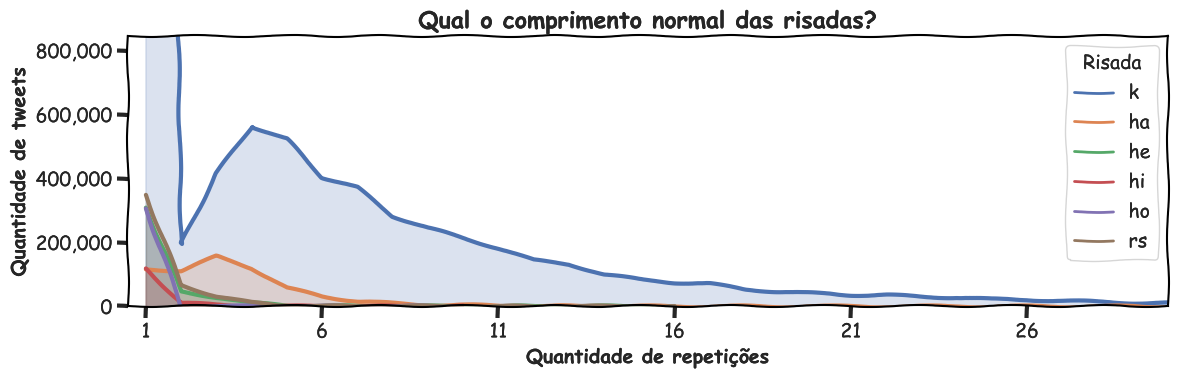

In [54]:
with plt.xkcd():
    plt.figure(figsize=FIGSIZE)
    rcParams['path.effects'] = [patheffects.withStroke(linewidth=4, foreground='none')]

    sns.lineplot(data=df_br, x="n", y="Count", hue="Risada", palette="deep", linewidth=3)
    # fill under every lineplot
    for i, line in enumerate(plt.gca().get_lines()):
        x, y = line.get_data()
        plt.fill_between(x, y, color=line.get_color(), alpha=0.2)

    rcParams['path.effects'] = [patheffects.withStroke(linewidth=4, foreground='w')]
    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.xlabel("Quantidade de repetições", fontweight="bold")
    plt.xticks(range(1, 31, 5), [str(k) for k in range(1, 31, 5)])
    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    # plt.gca().annotate("a maior parte dos tweets com 'k' \n não são risadas!",
    #         xy=(2, 8 * 10**5), xycoords='data',
    #         xytext=(3, 8 * 10**5), textcoords='data', arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")

    plt.ylim(0, 1.5     * max(df_br[df_br["n"] != 1]["Count"]))
    plt.xlim(0.5, 30)
    plt.title("Qual o comprimento normal das risadas?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risadas_br_lineplot.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

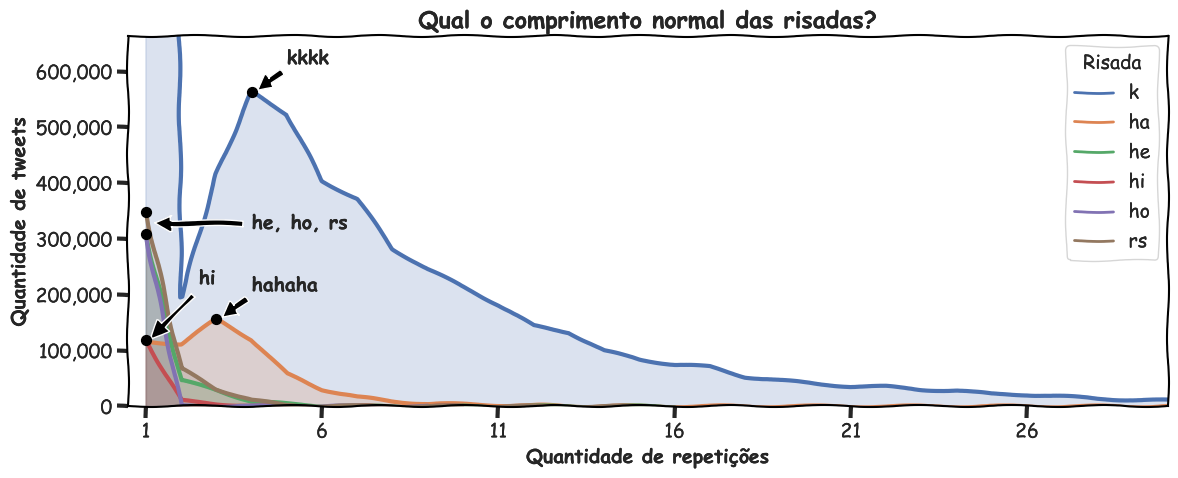

In [55]:
with plt.xkcd():
    plt.figure(figsize=(12, 5))

    rcParams['path.effects'] = [patheffects.withStroke(linewidth=4, foreground='none')]

    sns.lineplot(data=df_br, x="n", y="Count", hue="Risada", palette="deep", linewidth=3)
    # fill under every lineplot
    for i, line in enumerate(plt.gca().get_lines()):
        x, y = line.get_data()
        plt.fill_between(x, y, color=line.get_color(), alpha=0.2)


    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.xlabel("Quantidade de repetições", fontweight="bold")
    plt.xticks(range(1, 31, 5), [str(k) for k in range(1, 31, 5)])
    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    # plt.gca().annotate("a maior parte dos tweets com 'k' \n não são risadas!",
    #         xy=(2, 8 * 10**5), xycoords='data',
    #         xytext=(3, 8 * 10**5), textcoords='data', arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")

    kkkk = df[(df['Risada'] == "k") & (df['n'] == 4)]["Count"].values[0]
    plt.gca().annotate("kkkk", xy=(4.1, kkkk), xytext=(5, kkkk + 5*10**4), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")
    plt.scatter(x=[4], y=[kkkk], color="black", s=50, zorder=10)

    hahaha = df[(df['Risada'] == "ha") & (df['n'] == 3)]["Count"].values[0]
    plt.gca().annotate("hahaha", xy=(3.1, hahaha), xytext=(4, hahaha + 5*10**4), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")
    plt.scatter(x=[3], y=[hahaha], color="black", s=50, zorder=10)

    hehors = df[(df['Risada'] == "he") & (df['n'] == 1)]["Count"].values[0]
    plt.gca().annotate("he, ho, rs", xy=(1.1, hehors + 2*10**4), xytext=(4, hehors), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold", horizontalalignment='left', verticalalignment='bottom')
    plt.scatter(x=[1], y=[hehors], color="black", s=50, zorder=10)
    plt.scatter(x=[1], y=[df[(df['Risada'] == "rs") & (df['n'] == 1)]["Count"].values[0]], color="black", s=50, zorder=10)

    hi = df[(df['Risada'] == "hi") & (df['n'] == 1)]["Count"].values[0]
    plt.gca().annotate("hi", xy=(1.1, hi), xytext=(2.5, hi + 1*10**5), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")
    plt.scatter(x=[1], y=[hi], color="black", s=50, zorder=10)

    plt.ylim(0, 1.9  * max(df_br[df_br["Risada"] != 'k']["Count"]))
    plt.xlim(0.5, 30)
    plt.title("Qual o comprimento normal das risadas?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risadas_br_lineplot_2.png", dpi=300)
    plt.show()

In [56]:
# display_snippets("data/ho_twitter_2s_1-50.pkl", 4)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

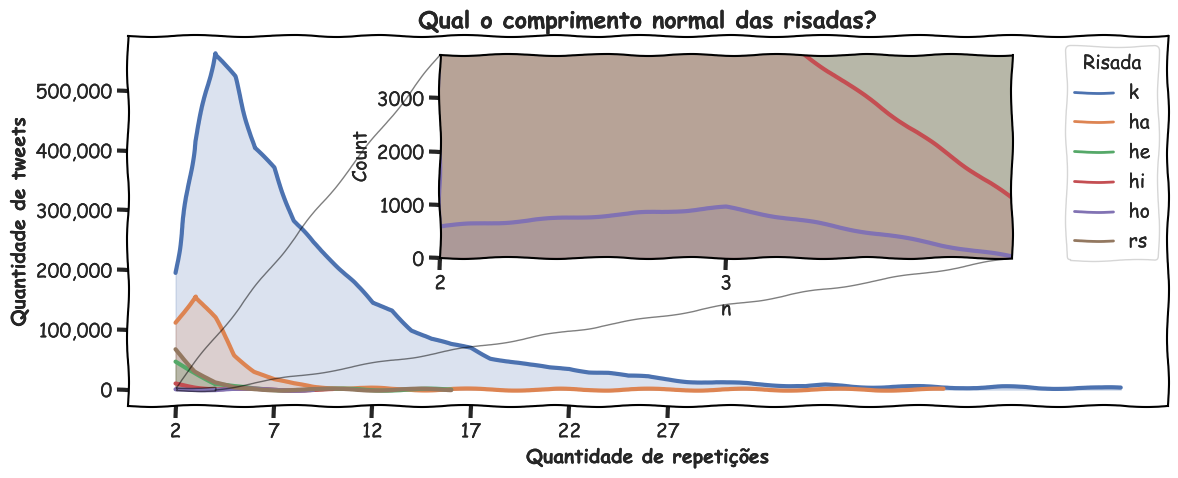

In [57]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

with plt.xkcd():
    plt.figure(figsize=(12, 5))

    rcParams['path.effects'] = [patheffects.withStroke(linewidth=4, foreground='none')]

    sns.lineplot(data=df_br[df_br['n'] > 1], x="n", y="Count", hue="Risada", palette="deep", linewidth=3)
    # fill under every lineplot
    for i, line in enumerate(plt.gca().get_lines()):
        x, y = line.get_data()
        plt.fill_between(x, y, color=line.get_color(), alpha=0.2)

    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.xlabel("Quantidade de repetições", fontweight="bold")
    plt.xticks(range(2, 32, 5), [str(k) for k in range(2, 32, 5)])
    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    # plt.ylim(0, 1.9  * max(df_br[df_br["Risada"] != 'k']["Count"]))
    # plt.xlim(1.5, 25)

    # create inset figure zoomed in on [2, 5]
    axins = plt.gca().inset_axes([0.3, 0.4, 0.55, 0.55])
    sns.lineplot(data=df_br, x="n", y="Count", hue="Risada", palette="deep", linewidth=3, ax=axins, legend=False)
    axins.set_xlim((2, 4))
    axins.set_ylim((0, 4 * max(df_br[(df_br["Risada"] == 'ho') & (df_br['n'] > 1)]["Count"])))
    # fill under every lineplot
    for i, line in enumerate(axins.get_lines()):
        x, y = line.get_data()
        axins.fill_between(x, y, color=line.get_color(), alpha=0.2)
    plt.gca().indicate_inset_zoom(axins, edgecolor="black")
    axins.set_xticks(range(2, 4), [str(k) for k in range(2, 4)])

    plt.title("Qual o comprimento normal das risadas?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risadas_br_lineplot_3.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

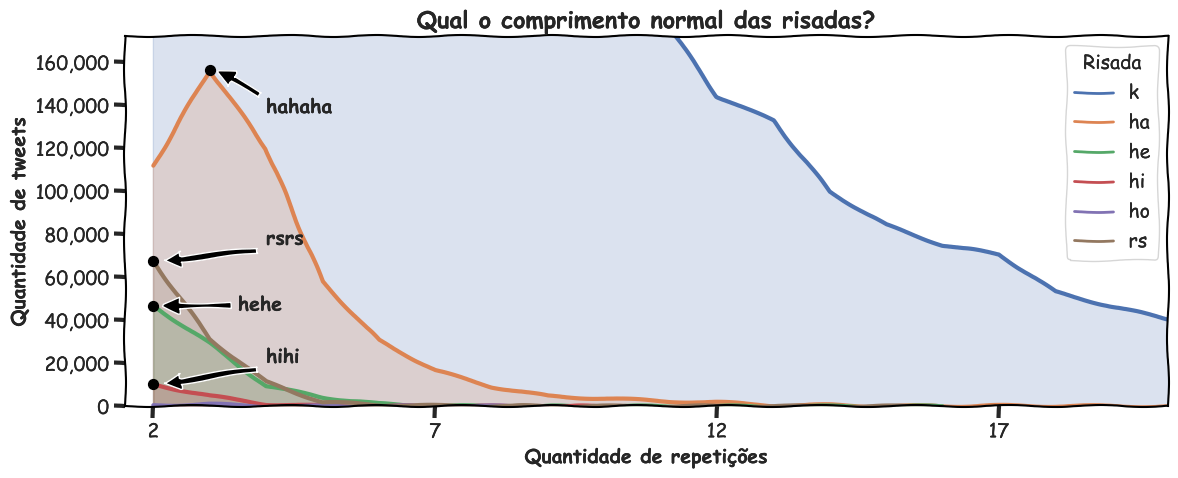

In [58]:
with plt.xkcd():
    plt.figure(figsize=(12, 5))

    rcParams['path.effects'] = [patheffects.withStroke(linewidth=4, foreground='none')]

    sns.lineplot(data=df_br[df_br['n'] > 1], x="n", y="Count", hue="Risada", palette="deep", linewidth=3)
    # fill under every lineplot
    for i, line in enumerate(plt.gca().get_lines()):
        x, y = line.get_data()
        plt.fill_between(x, y, color=line.get_color(), alpha=0.2)

    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.xlabel("Quantidade de repetições", fontweight="bold")
    plt.xticks(range(2, 32, 5), [str(k) for k in range(2, 32, 5)])
    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    hahaha = df[(df['Risada'] == "ha") & (df['n'] == 3)]["Count"].values[0]
    plt.gca().annotate("hahaha", xy=(3.1, hahaha), xytext=(4, hahaha - 2*10**4), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")
    plt.scatter(x=[3], y=[hahaha], color="black", s=50, zorder=10)

    rsrs = df[(df['Risada'] == "rs") & (df['n'] == 2)]["Count"].values[0]
    plt.gca().annotate("rsrs", xy=(2.1, rsrs), xytext=(4, rsrs + 1*10**4), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold", verticalalignment="center")
    plt.scatter(x=[2], y=[rsrs], color="black", s=50, zorder=10)

    hihi = df[(df['Risada'] == "hi") & (df['n'] == 2)]["Count"].values[0]
    plt.gca().annotate("hihi", xy=(2.1, hihi), xytext=(4, hihi + 1*10**4), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")
    plt.scatter(x=[2], y=[hihi], color="black", s=50, zorder=10)

    hehe = df[(df['Risada'] == "he") & (df['n'] == 2)]["Count"].values[0]
    plt.gca().annotate("hehe", xy=(2.1, hehe), xytext=(3.5, hehe), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold", verticalalignment="center")
    plt.scatter(x=[2], y=[hehe], color="black", s=50, zorder=10)

    plt.ylim(0, 1.1 * max(df_br[(df_br["Risada"] != 'k') & (df_br["n"] > 1)]["Count"]))
    plt.xlim(1.5, 20)
    plt.title("Qual o comprimento normal das risadas?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risadas_br_lineplot_3-1.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

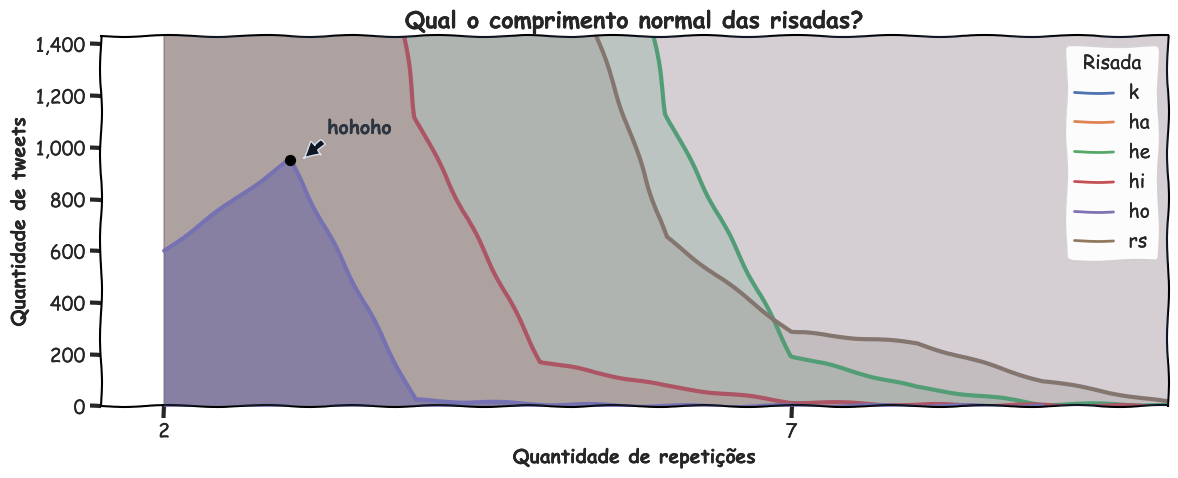

In [59]:
with plt.xkcd():
    plt.figure(figsize=(12, 5))

    rcParams['path.effects'] = [patheffects.withStroke(linewidth=4, foreground='none')]

    sns.lineplot(data=df_br[df_br['n'] > 1], x="n", y="Count", hue="Risada", palette="deep", linewidth=3)
    # fill under every lineplot
    for i, line in enumerate(plt.gca().get_lines()):
        x, y = line.get_data()
        plt.fill_between(x, y, color=line.get_color(), alpha=0.7 if i == 4 else 0.2, zorder=1+(3 if i == 0 else 0))

    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.xlabel("Quantidade de repetições", fontweight="bold")
    plt.xticks(range(2, 32, 5), [str(k) for k in range(2, 32, 5)])
    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    hohoho = df[(df['Risada'] == "ho") & (df['n'] == 3)]["Count"].values[0]
    plt.gca().annotate("hohoho", xy=(3.1, hohoho), xytext=(3.3, hohoho + 100), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")
    plt.scatter(x=[3], y=[hohoho], color="black", s=50, zorder=10)

    plt.ylim(0, 1.5 * max(df_br[(df_br["Risada"] == 'ho') & (df_br["n"] > 1)]["Count"]))
    plt.xlim(1.5, 10)
    plt.title("Qual o comprimento normal das risadas?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risadas_br_lineplot_4.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

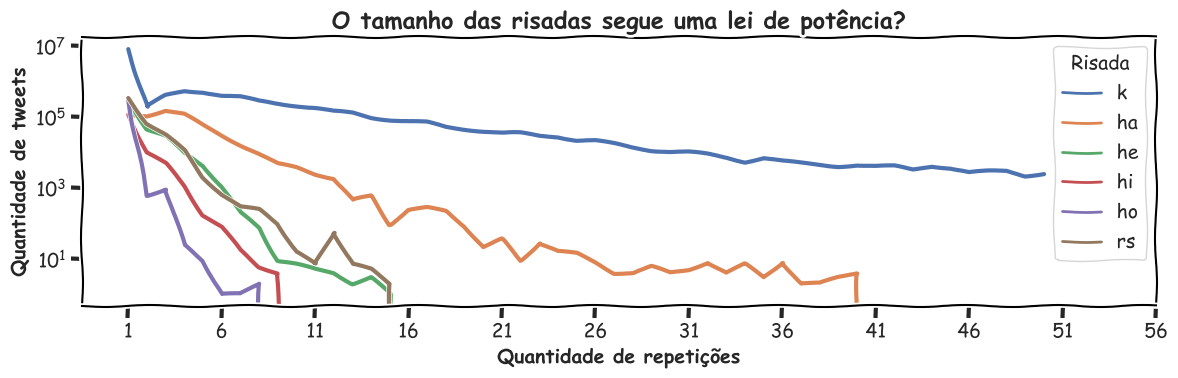

In [70]:
with plt.xkcd():
    plt.figure(figsize=FIGSIZE)

    sns.lineplot(data=df_br, x="n", y="Count", hue="Risada", linewidth=3, palette="deep")

    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.xlabel("Quantidade de repetições", fontweight="bold")
    plt.xticks(range(1, 61, 5), [str(k) for k in range(1, 61, 5)])

    # plt.xscale("log")
    plt.yscale("log")
    plt.title("O tamanho das risadas segue uma lei de potência?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risadas_loglog.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

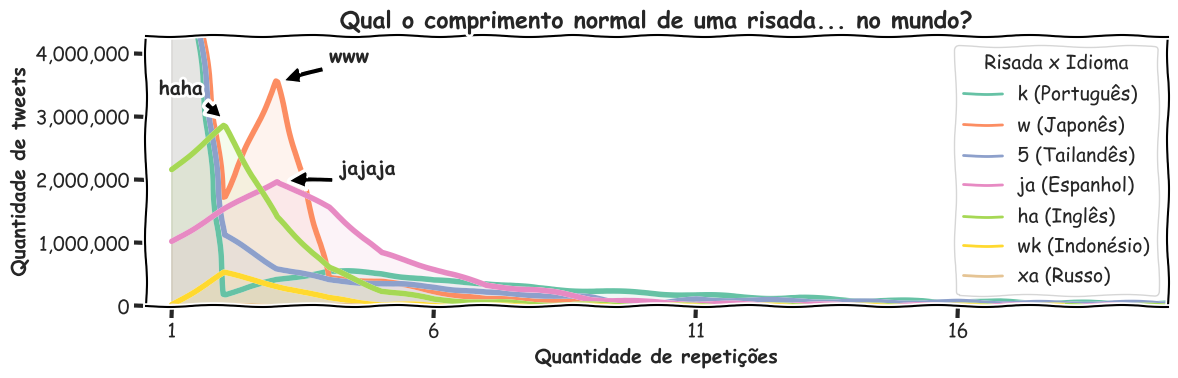

In [61]:
sns.set_style("ticks")
with plt.xkcd():
    plt.figure(figsize=FIGSIZE)
    sns.lineplot(data=df_int, x="n", y="Count", hue="Risada x Idioma", palette="Set2", linewidth=4)
    for i, line in enumerate(plt.gca().get_lines()):
        x, y = line.get_data()
        plt.fill_between(x, y, color=line.get_color(), alpha=0.1)

    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.xticks(range(1, 31, 5), [str(k) for k in range(1, 31, 5)])
    plt.ylim(0, 1.2 * max(df_int[df_int["n"] > 1]["Count"]))
    plt.xlim(0.5, 20)

    plt.xlabel("Quantidade de repetições", fontweight="bold")
    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.title("Qual o comprimento normal de uma risada... no mundo?", fontweight="bold")

    www = df[(df['Risada'] == "w") & (df['n'] == 3)]["Count"].values[0]
    plt.gca().annotate("www", xy=(3.1, www), xytext=(4, www + 3*10**5), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")

    haha = df[(df['Risada'] == "ha") & (df['n'] == 2) & (df["Idioma"] == "Inglês")]["Count"].values[0]
    plt.gca().annotate("haha", xy=(2, haha + 10**5), xytext=(0.75, haha + 5*10**5), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")

    jajaja = df[(df['Risada'] == "ja") & (df['n'] == 3)]["Count"].values[0]
    plt.gca().annotate("jajaja", xy=(3.2, jajaja), xytext=(4.2, jajaja + 10**5), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risada_int_lineplot_1.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

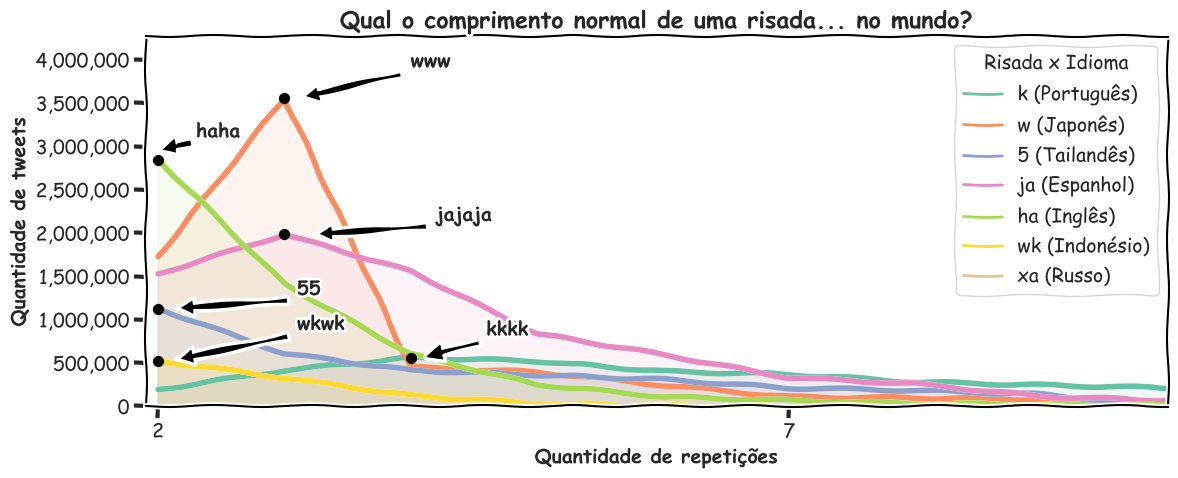

In [85]:
sns.set_style("ticks")
with plt.xkcd():
    df_ = df_int[df_int['n'] > 1]

    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df_, x="n", y="Count", hue="Risada x Idioma", palette="Set2", linewidth=4)
    for i, line in enumerate(plt.gca().get_lines()):
        x, y = line.get_data()
        plt.fill_between(x, y, color=line.get_color(), alpha=0.1)

    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.xticks(range(2, 32, 5), [str(k) for k in range(2, 32, 5)])
    plt.ylim(0, 1.2 * max(df_[df_["n"] > 1]["Count"]))
    plt.xlim(1.9, 10)

    plt.xlabel("Quantidade de repetições", fontweight="bold")
    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.title("Qual o comprimento normal de uma risada... no mundo?", fontweight="bold")

    www = df_[(df_['Risada'] == "w") & (df_['n'] == 3)]["Count"].values[0]
    plt.gca().annotate("www", xy=(3.1, www), xytext=(4, www + 3*10**5), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold", verticalalignment="bottom")
    plt.scatter(3, www, color="black", s=50, zorder=10)

    haha = df_[(df_['Risada'] == "ha") & (df_['n'] == 2) & (df_["Idioma"] == "Inglês")]["Count"].values[0]
    plt.gca().annotate("haha", xy=(2, haha + 10**5), xytext=(2.3, haha + 2*10**5), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold", verticalalignment="bottom")
    plt.scatter(2, haha, color="black", s=50, zorder=10)

    jajaja = df_[(df_['Risada'] == "ja") & (df_['n'] == 3)]["Count"].values[0]
    plt.gca().annotate("jajaja", xy=(3.2, jajaja), xytext=(4.2, jajaja + 10**5), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold", verticalalignment="bottom")
    plt.scatter(3, jajaja, color="black", s=50, zorder=10)

    l55 = df_[(df_['Risada'] == "5") & (df_['n'] == 2)]["Count"].values[0]
    plt.gca().annotate("55", xy=(2.1, l55), xytext=(3.1, l55 + 10**5), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold", verticalalignment="bottom")
    plt.scatter(2, l55, color="black", s=50, zorder=10)

    wkwk = df_[(df_['Risada'] == "wk") & (df_['n'] == 2)]["Count"].values[0]
    plt.gca().annotate("wkwk", xy=(2.1, wkwk), xytext=(3.1, wkwk + 3*10**5), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold", verticalalignment="bottom")
    plt.scatter(2, wkwk, color="black", s=50, zorder=10)

    kkkk = df_[(df_['Risada'] == "k") & (df_['n'] == 4)]["Count"].values[0]
    plt.gca().annotate("kkkk", xy=(4.1, kkkk), xytext=(4.6, kkkk + 2*10**5), arrowprops=dict(facecolor='black', shrink=0.05), fontweight="bold", verticalalignment="bottom")
    plt.scatter(4, kkkk, color="black", s=50, zorder=10)

    plt.tight_layout()
    plt.savefig("figures/risada_int_lineplot_1-1.png", dpi=300)
    plt.show()

In [117]:
display_snippets("data/w_twitter_2s_1-50.pkl", 3)

total results: 3560000
--------------------------------------------------
下北www.2023 (@smktwww2023) / X
	 京王電鉄とお笑いライブ「下北GRIP」がコラボ 2023年5月18日（木）～5月21日（日）に、ミカン下北にて実験型お笑いライブフェス『下北www.2023』の開催が決定！
	 https://twitter.com/smktwww2023
--------------------------------------------------
Biya C102日曜 東C-09a on Twitter: "www BIYA'S OC/ YUNA ...
	 21 Apr 2022 ... www BIYA'S OC/ YUNA | GinBBye #pixiv. Translate Tweet. pixiv.net. BIYA'S OC/ YUNA. Thanks for Original Character: ...
	 https://twitter.com/biya1024/status/1516977566376071168
--------------------------------------------------
WWW / WWW X
	 渋谷のライブスペースWWW、WWW Xのオフィシャルアカウント。WWW、WWW X公演情報の他、WWWが主催/企画/制作する外部公演の情報も発信。最深部WWWβは.
	 https://twitter.com/WWW_shibuya
--------------------------------------------------
https://www.nintendo.co.jp/zelda/totk/index.html (@dekitakoto) / X
	 途中色んな人に直してもらったのに結局スピーチで蝶ネクタイが曲がっていたアルフレッド. Image. 86. 701. https://www.nintendo.co.jp/zelda/totk/index.html.
	 https://twitter.com/dekitakoto
----------------------------

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

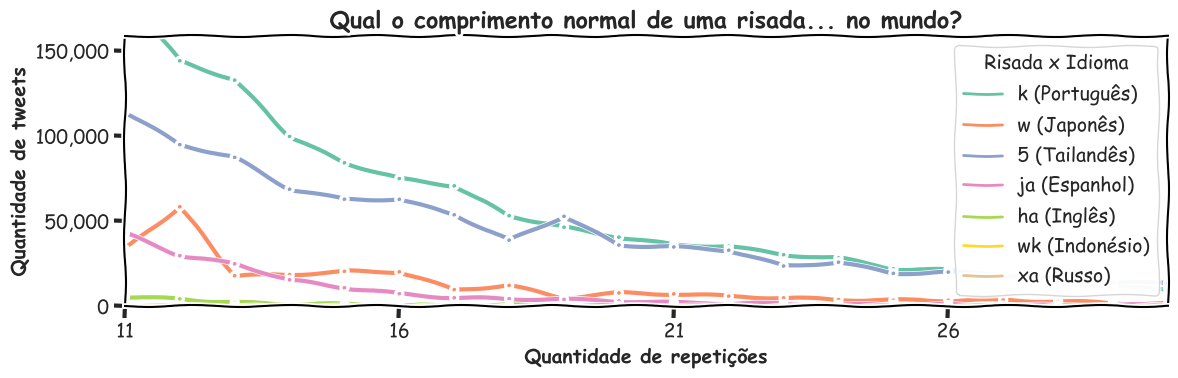

In [63]:
with plt.xkcd():
    plt.figure(figsize=FIGSIZE)
    sns.lineplot(data=df_int, x="n", y="Count", hue="Risada x Idioma", palette="Set2", marker=".", linewidth=3)

    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xticks(range(1, 31, 5), [str(k) for k in range(1, 31, 5)])

    # plt.ylim(0, 1.1 * max(df_int[df_int["n"] > 5]["Count"]))
    # plt.xlim(0.5, 30)
    plt.xlim(11, 30)
    plt.ylim(0, 1.1 * max(df_int[(df_int["n"] > 11) & (df_int["n"] < 31)]["Count"]))

    plt.xlabel("Quantidade de repetições", fontweight="bold")
    plt.ylabel("Quantidade de tweets", fontweight="bold")
    plt.title("Qual o comprimento normal de uma risada... no mundo?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risada_int_lineplot_2.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

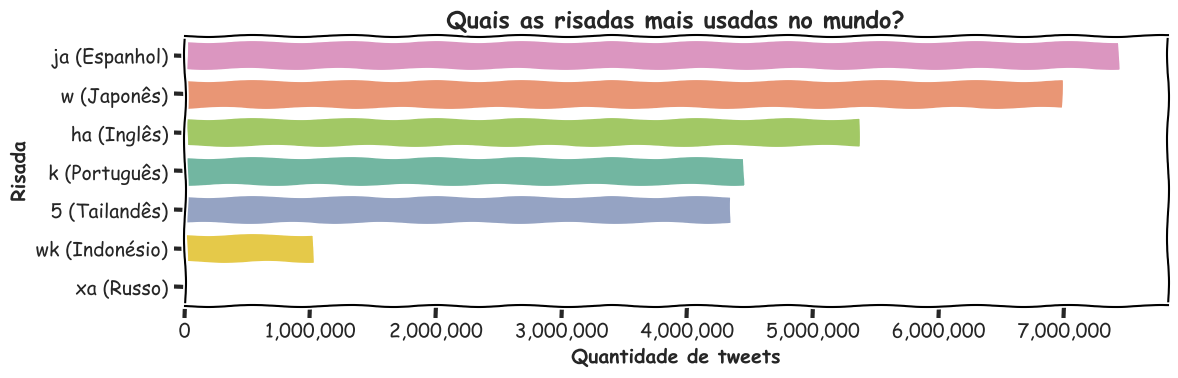

In [118]:
with plt.xkcd():
    df_ = df_int[df_int['n'] > 1].groupby("Risada").agg({"Risada ID": "first", "Count": "sum",
                                                        "Idioma": "first", "Risada x Idioma": "first"})
    df_ = df_.sort_values(by="Risada ID")
    df_ = df_.reset_index()
    df_.sort_values(by="Count", ascending=False, inplace=True)
    colors = [sns.color_palette("Set2")[i] for i in df_.index.values]

    plt.figure(figsize=FIGSIZE)
    sns.barplot(data=df_, y="Risada x Idioma", x="Count", orient='h', palette=colors, linewidth=3)

    plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.xlabel("Quantidade de tweets", fontweight="bold")
    plt.ylabel("Risada", fontweight="bold")
    plt.title("Quais as risadas mais usadas no mundo?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risada_int_bars.png", dpi=300)
    plt.show()

In [120]:
language_speakers = [{"Idioma": "Português", "Users": 26395400},
                     {"Idioma": "Inglês", "Users": 150291700},
                     {"Idioma": "Japonês", "Users": 67450000},
                     {"Idioma": "Espanhol", "Users": 57911000},
                     {"Idioma": "Indonésio", "Users": 24000000},
                     {"Idioma": "Tailandês", "Users": 14600000}]

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

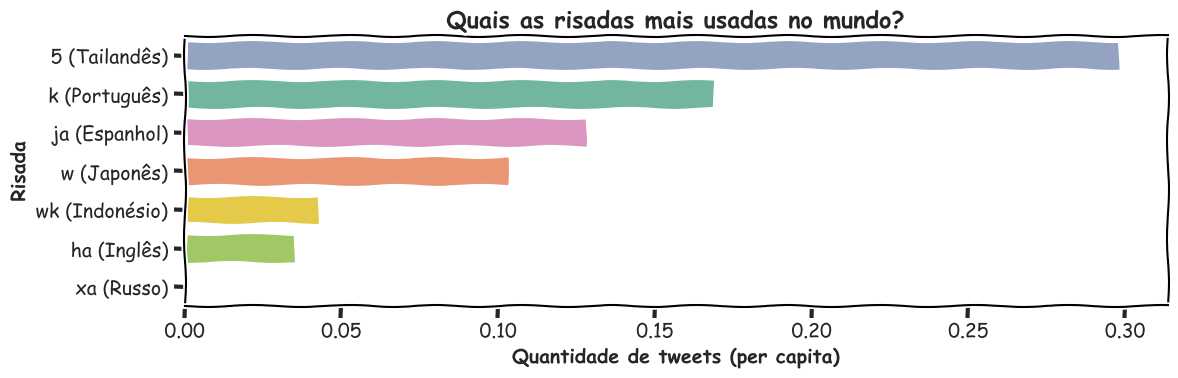

In [122]:
with plt.xkcd():
    df_ = df_int[df_int['n'] > 1].groupby("Risada").agg({"Risada ID": "first", "Count": "sum",
                                                        "Idioma": "first", "Risada x Idioma": "first"})
    df_["Count"] /= df_["Idioma"].map({k["Idioma"]: k["Users"] for k in language_speakers})
    df_ = df_.sort_values(by="Risada ID")
    df_ = df_.reset_index()
    df_.sort_values(by="Count", ascending=False, inplace=True)
    colors = [sns.color_palette("Set2")[i] for i in df_.index.values]

    plt.figure(figsize=FIGSIZE)
    sns.barplot(data=df_, y="Risada x Idioma", x="Count", orient='h', palette=colors, linewidth=3)

    # plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.xlabel("Quantidade de tweets (per capita)", fontweight="bold")
    plt.ylabel("Risada", fontweight="bold")
    plt.title("Quais as risadas mais usadas no mundo?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risada_int_bars_capita.png", dpi=300)
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

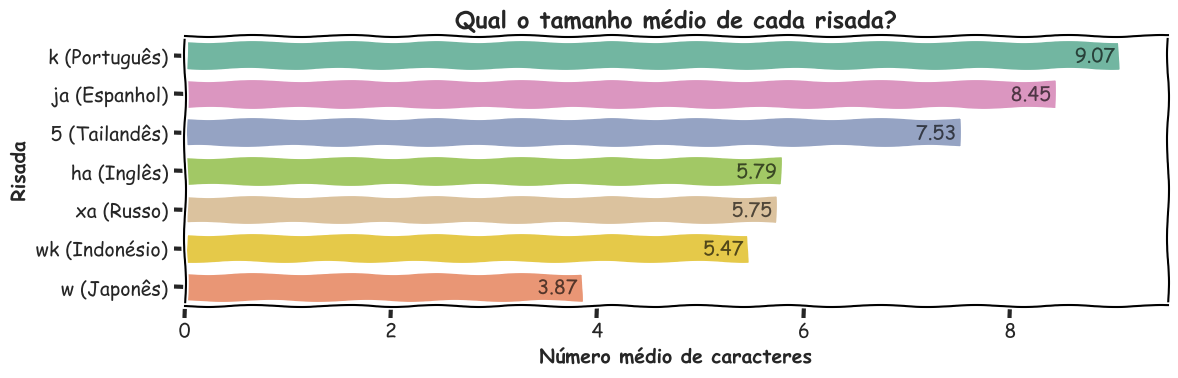

In [151]:
with plt.xkcd():
    df_ = df_int[df_int['n'] > 1].groupby(["Risada", "Idioma"]).agg({"Risada ID": "first", "Count": "sum", "Risada x Idioma": "first", "Partículas": "sum"})
    df_ = df_.sort_values(by="Risada ID")
    df_ = df_.reset_index()
    df_.loc[:, "Número médio de caracteres"] = df_["Partículas"] / df_["Count"]
    # multiply mean by 2 if 'Risada' contains 2 chars
    df_["Número médio de caracteres"] = df_.apply(lambda x: x["Número médio de caracteres"] * 2 if len(x["Risada"]) == 2 else x["Número médio de caracteres"], axis=1)
    df_ = df_.sort_values(by="Número médio de caracteres", ascending=False)
    colors = [sns.color_palette("Set2")[i] for i in df_.index.values]

    plt.figure(figsize=FIGSIZE)
    sns.barplot(data=df_, y="Risada x Idioma", x="Número médio de caracteres", orient='h', linewidth=3, palette=colors)

    rcParams['path.effects'] = [patheffects.withStroke(linewidth=4, foreground='none')]

    # ax.text(df_["Count"][0] - 400000, 0.125, str(int(df_["Count"][0])), color='black', fontweight='bold')
    for i, v in enumerate(df_["Número médio de caracteres"]):
        plt.gca().text(v - 0.45, i + 0.17, round(v, 2), color='black', alpha=0.4)

    plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.xlabel("Número médio de caracteres", fontweight="bold")
    plt.ylabel("Risada", fontweight="bold")
    plt.title("Qual o tamanho médio de cada risada?", fontweight="bold")

    plt.tight_layout()
    plt.savefig("figures/risada_int_bars_size.png", dpi=300)
    plt.show()

# 4. __

In [66]:
def display_snippets(filename, pos=0):
    """ Displays the snippets from the given file.
     :param filename: name of the file to be plotted
     :param pos: position of the snippet to be displayed"""

    with open(filename, "rb") as f:
        data = pickle.load(f)

    for i, r in enumerate(data):
        m = r[0][0]['items'][pos]
        print(f"-" * 50)
        print(f"qt: {i+1}, total: {r[0][0]['searchInformation']['totalResults']}")
        print(m['title'])
        print("\t", m['snippet'])

In [67]:
counts = [get_count_from_file("data/k_twitter_2s_1-50_count_1.json"),
          get_count_from_file("data/k_twitter_2s_1-50_count_2.json"),
          get_count_from_file("data/k_twitter_2s_1-50_count_3.json"),
          get_count_from_file("data/k_twitter_2s_1-50_count_4.json")]
count = np.concatenate(counts, axis=1)
with open("data/k_twitter_2s_1-50_count.json", "w") as f:
    json.dump(count.tolist(), f, indent=4)

In [68]:
with plt.xkcd():
    plot_bars_results(counts=get_count_from_file("data/k_twitter_2s_1-50_count.json"), ignore_first_ks=1)

NameError: name 'plot_bars_results' is not defined

In [ ]:
plot_logscale_results(counts=get_count_from_file("data/k_twitter_2s_1-50_count.json"), ignore_first_ks=1)

plt.xlim((1, 50))

In [ ]:
data = get_count_from_file("data/k_twitter_2s_1-50.pkl")
data = np.mean(data, axis=1)
data

In [ ]:
fit = pwl.Fit(data)
print(f"alpha: {fit.alpha}, xmin: {fit.xmin}, c: {fit.sigma}")

In [ ]:
# pwl.plot_ccdf(data, color="C1", marker='o', label="Data")
fit.power_law.plot_ccdf(color="C0", linestyle="--", label="Power Law")

# fit.plot_ccdf(color="C1", marker='o', label="Data")
plt.scatter(data, np.linspace(0, len(data)/50, 50), color="C1", marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Quantidade de tweets")
plt.ylabel("Frequência")

In [ ]:
fit = pwl.Fit(data[1:], xmax=10**5)
fig = fit.plot_cdf(linewidth=3)
fit.truncated_power_law.plot_cdf(ax=fig, linestyle="--", color="C5", label="Truncated Power Law")
fit.power_law.plot_cdf(ax=fig, linestyle="--", color="C1", label="Power Law")
fit.lognormal.plot_cdf(ax=fig, linestyle="--", color="C2", label="Lognormal")
fit.stretched_exponential.plot_cdf(ax=fig, linestyle="--", color="C3", label="Stretched Exponential")
plt.legend()

In [ ]:
pwl.Truncated_Power_Law

In [ ]:
# Fit data to power law distribution
fit = pwl.Fit(data[1:])

# Get estimated exponent of power law distribution
alpha = fit.alpha

# Perform goodness-of-fit test
D, p = fit.distribution_compare('truncated_power_law', 'lognormal')

print(f"Estimated exponent: {alpha}")
print(f"Distribution compare - Power law vs Lognormal: D = {D}, p = {p}")